In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('train.csv')

test_df = pd.read_csv('test.csv')

In [3]:
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

In [4]:
import warnings
warnings.simplefilter(action='ignore')

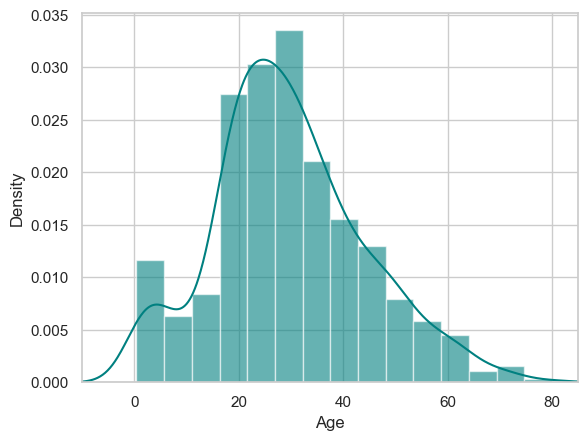

In [5]:
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

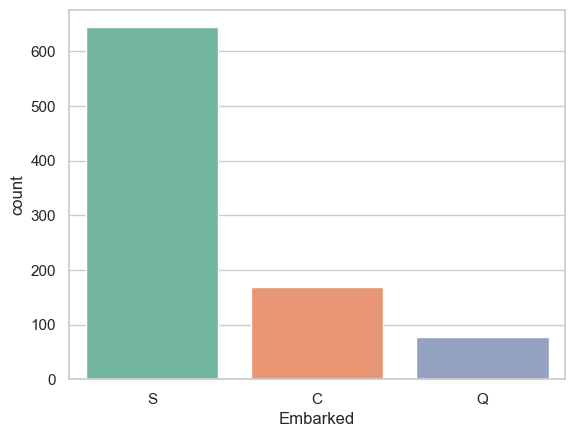

In [6]:
sns.countplot(x='Embarked', data=train_df, palette='Set2')
plt.show()

In [7]:
train_data = train_df.copy()
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

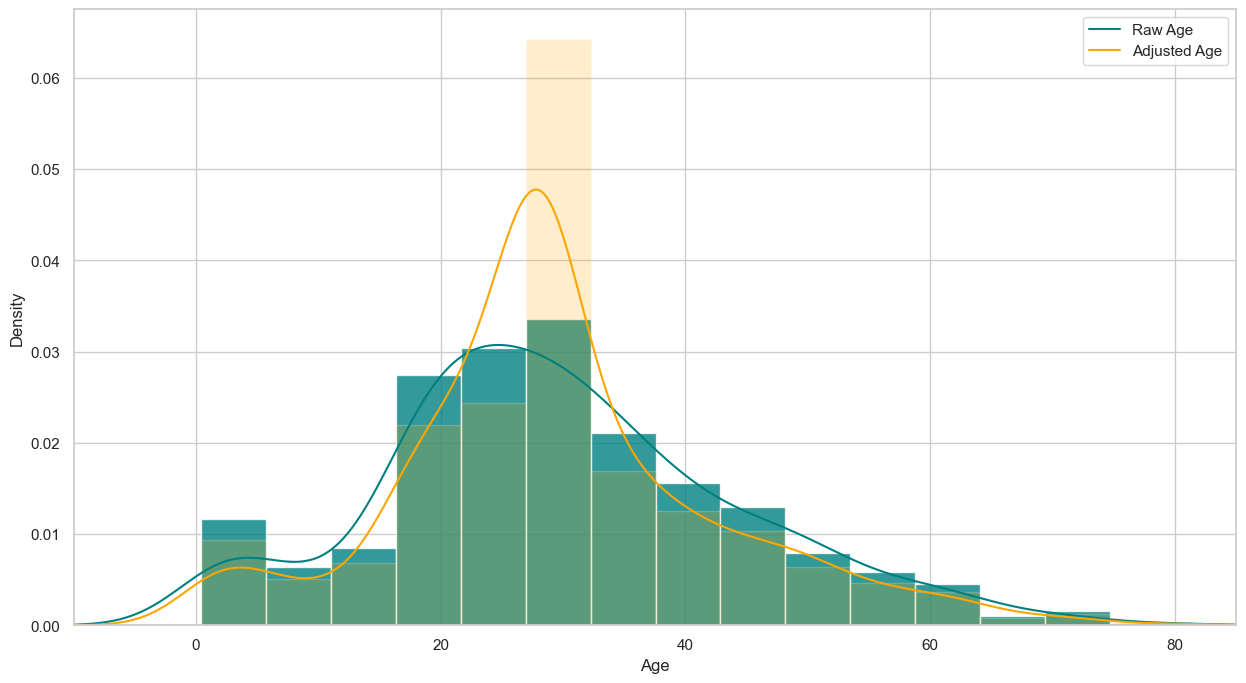

In [8]:
plt.figure(figsize=(15,8))
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.8)
train_df["Age"].plot(kind='density', color='teal')
ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.2)
train_data["Age"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

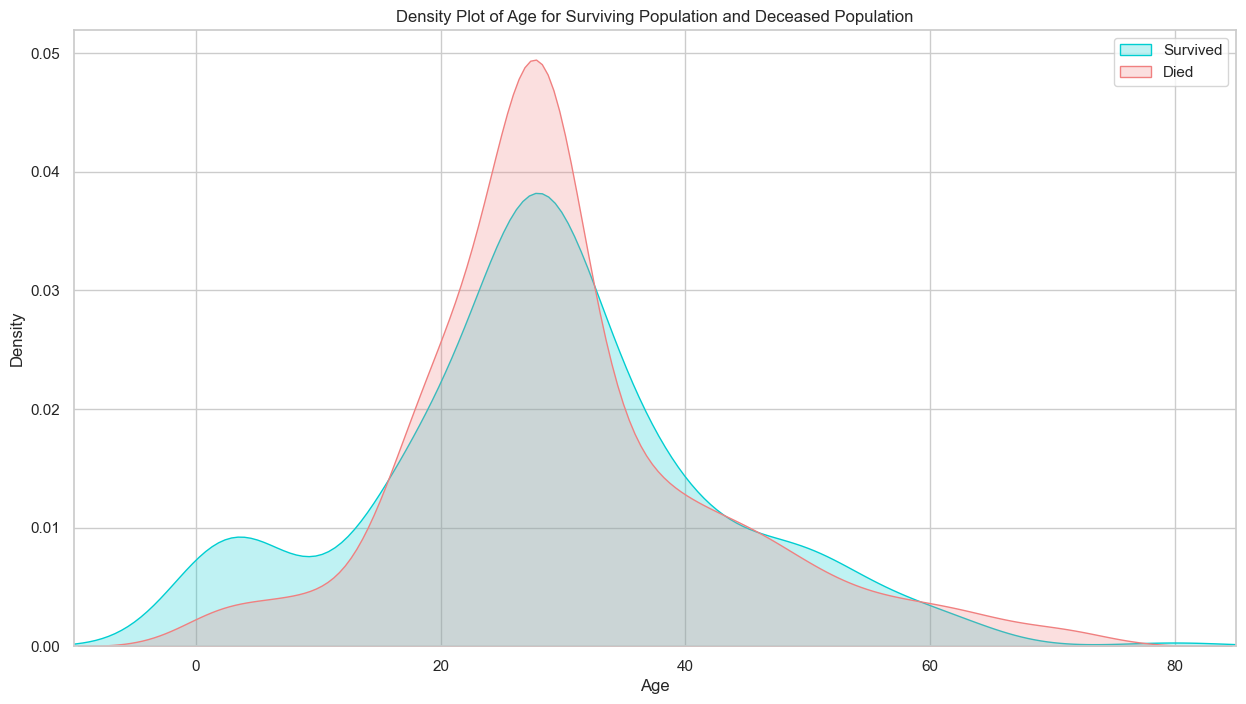

In [9]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train_data["Age"][train_data.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(train_data["Age"][train_data.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

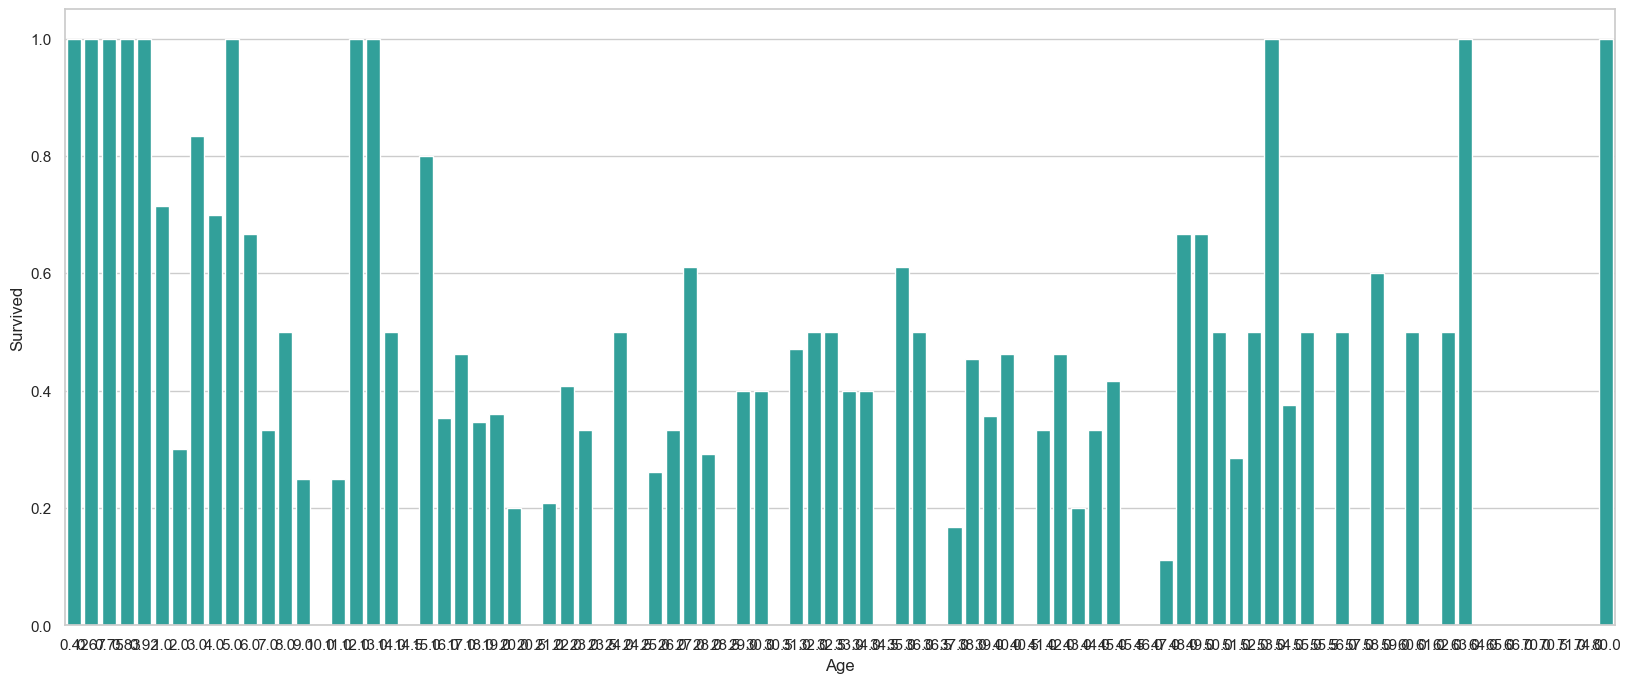

In [10]:
plt.figure(figsize=(20,8))
avg_survival_byage = train_data[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")
plt.show()

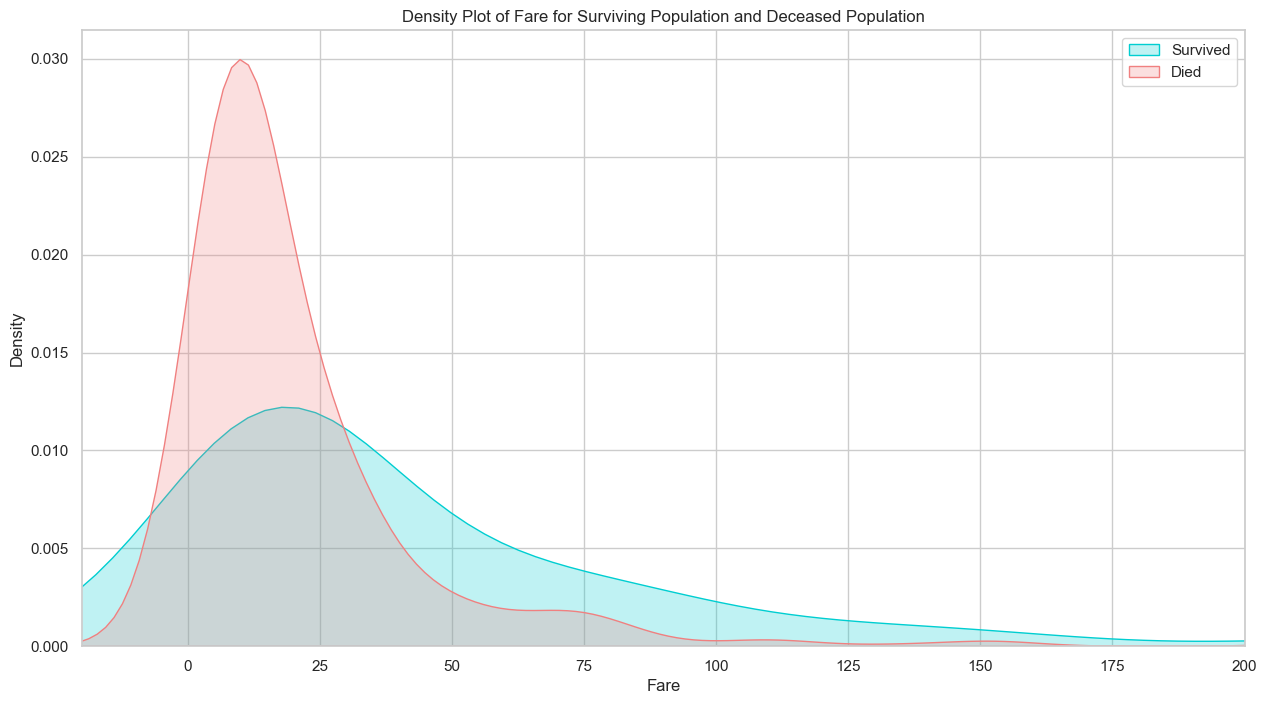

In [11]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train_data["Fare"][train_data.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(train_data["Fare"][train_data.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

In [12]:
train_df.head(n = 3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [13]:
train_df.shape

(891, 12)

In [14]:
test_df.shape

(418, 11)

In [15]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [16]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
print(177/891*100, "% of data missing in age col")
print(687/891*100, "% of data missing in cabin col")

19.865319865319865 % of data missing in age col
77.10437710437711 % of data missing in cabin col


In [18]:
#mean 
print(train_df['Age'].mean(skipna=True))
#median
print(train_df['Age'].median(skipna=True))
#max occurance string
print(train_df['Embarked'].value_counts().idxmax())

29.69911764705882
28.0
S


In [19]:
dataset = train_df

In [20]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
dataset['Age'].fillna(train_df['Age'].median(skipna=True), inplace=True)
dataset['Embarked'].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
dataset.drop('Cabin', axis = 1, inplace=True)

In [22]:
dataset.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [23]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
dataset['Company'] = np.where((dataset['SibSp'] + dataset['Parch']) > 0, 1, 0)

In [25]:
dataset.drop('SibSp', axis = 1, inplace=True)
dataset.drop('Parch', axis = 1, inplace=True)

In [26]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Company
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,W./C. 6607,23.4500,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.0000,C,0


In [27]:
dataset.drop('Name', axis = 1, inplace=True)
dataset.drop('Ticket', axis = 1, inplace=True)
dataset.drop('PassengerId', axis = 1, inplace=True)

In [28]:
dataset

,Survived,Pclass,Sex,Age,Fare,Embarked,Company
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,0
887,1,1,female,19.0,30.0000,S,0
888,0,3,female,28.0,23.4500,S,1
889,1,1,male,26.0,30.0000,C,0


In [29]:
train_dataset = pd.get_dummies(dataset, columns=['Embarked', 'Sex'])

In [30]:
train_dataset.head()

,Survived,Pclass,Age,Fare,Company,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,22.0,7.2500,1,0,0,1,0,1
1,1,1,38.0,71.2833,1,1,0,0,1,0
2,1,3,26.0,7.9250,0,0,0,1,1,0
3,1,1,35.0,53.1000,1,0,0,1,1,0
4,0,3,35.0,8.0500,0,0,0,1,0,1


In [31]:
train_dataset['Embarked_C'] = np.where(train_dataset['Embarked_C'] == True, 1, 0)

In [32]:
train_dataset['Embarked_Q'] = np.where(train_dataset['Embarked_Q'] == True, 1, 0)

In [33]:
train_dataset['Embarked_S'] = np.where(train_dataset['Embarked_S'] == True, 1, 0)

In [34]:
train_dataset['Sex_female'] = np.where(train_dataset['Sex_female'] == True, 1, 0)
train_dataset['Sex_male'] = np.where(train_dataset['Sex_male'] == True, 1, 0)

In [35]:
Y_train = train_dataset['Survived']
train_dataset.drop('Survived', axis = 1, inplace=True)

In [36]:
train_dataset

,Pclass,Age,Fare,Company,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,3,22.0,7.2500,1,0,0,1,0,1
1,1,38.0,71.2833,1,1,0,0,1,0
2,3,26.0,7.9250,0,0,0,1,1,0
3,1,35.0,53.1000,1,0,0,1,1,0
4,3,35.0,8.0500,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,2,27.0,13.0000,0,0,0,1,0,1
887,1,19.0,30.0000,0,0,0,1,1,0
888,3,28.0,23.4500,1,0,0,1,1,0
889,1,26.0,30.0000,0,1,0,0,0,1


<AxesSubplot: >

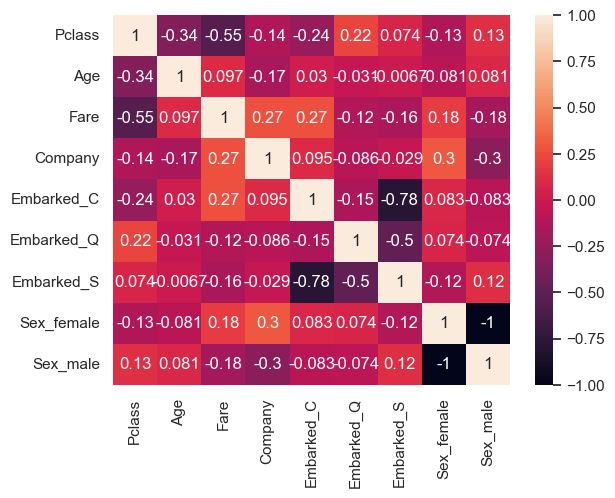

In [37]:
sns.heatmap(train_dataset.corr(), annot=True)

# Test Dataset

In [38]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [39]:
dataset = test_df
dataset['Age'].fillna(test_df['Age'].median(skipna=True), inplace=True)
dataset['Fare'].fillna(test_df['Fare'].median(skipna=True), inplace=True)
dataset.drop('Cabin', axis = 1, inplace=True)

In [40]:
dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,S


In [41]:
dataset['Company'] = np.where((dataset['SibSp'] + dataset['Parch']) > 0, 1, 0)
dataset.drop('SibSp', axis = 1, inplace=True)
dataset.drop('Parch', axis = 1, inplace=True)
dataset.drop('Name', axis = 1, inplace=True)
dataset.drop('Ticket', axis = 1, inplace=True)
dataset.drop('PassengerId', axis = 1, inplace=True)

In [42]:
dataset

,Pclass,Sex,Age,Fare,Embarked,Company
0,3,male,34.5,7.8292,Q,0
1,3,female,47.0,7.0000,S,1
2,2,male,62.0,9.6875,Q,0
3,3,male,27.0,8.6625,S,0
4,3,female,22.0,12.2875,S,1
...,...,...,...,...,...,...
413,3,male,27.0,8.0500,S,0
414,1,female,39.0,108.9000,C,0
415,3,male,38.5,7.2500,S,0
416,3,male,27.0,8.0500,S,0


In [43]:
test_dataset = pd.get_dummies(dataset, columns=['Embarked', 'Sex'])

In [44]:
test_dataset['Embarked_C'] = np.where(test_dataset['Embarked_C'] == True, 1, 0)

In [45]:
test_dataset['Embarked_Q'] = np.where(test_dataset['Embarked_Q'] == True, 1, 0)

In [46]:
test_dataset['Embarked_S'] = np.where(test_dataset['Embarked_S'] == True, 1, 0)

In [47]:
test_dataset['Sex_female'] = np.where(test_dataset['Sex_female'] == True, 1, 0)
test_dataset['Sex_male'] = np.where(test_dataset['Sex_male'] == True, 1, 0)

In [48]:
test_dataset

,Pclass,Age,Fare,Company,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,3,34.5,7.8292,0,0,1,0,0,1
1,3,47.0,7.0000,1,0,0,1,1,0
2,2,62.0,9.6875,0,0,1,0,0,1
3,3,27.0,8.6625,0,0,0,1,0,1
4,3,22.0,12.2875,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
413,3,27.0,8.0500,0,0,0,1,0,1
414,1,39.0,108.9000,0,1,0,0,1,0
415,3,38.5,7.2500,0,0,0,1,0,1
416,3,27.0,8.0500,0,0,0,1,0,1


In [49]:
test_df.isna().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Company     0
dtype: int64

In [50]:
def sigmoid(X):
    return 1/(1 + np.exp(-X))

In [51]:
def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

In [52]:
def cost(X, Y, theta):
    y_p = hypothesis(X, theta)
    
    loss = -1*(np.mean(Y*np.log(y_p) + (1 - Y)*np.log(1 - y_p)))
    
    return loss

In [53]:
def gradient(X, Y, theta):
    y_p = hypothesis(X, theta)
    
    grad = X.T@(Y - y_p)
    
    return grad/X.shape[0]

In [54]:
def gradient_descent(X, Y, learning_rate = 0.003, epochs = 1000):
    m, n = X.shape
    theta = np.zeros((n, 1))
    
    cost_epoch = []
    
    for i in range(epochs):
        loss = cost(X, Y, theta)
        grad = gradient(X, Y, theta)
        cost_epoch.append(loss)
        
        theta = theta + learning_rate*grad
        
    return theta, cost_epoch

In [55]:
X_train = train_dataset.values
Y_train = Y_train.values
X_test = test_dataset.values

In [56]:
Y_train = Y_train.reshape((-1, 1))

In [57]:
print(X_train.shape, Y_train.shape, X_test.shape)

(891, 9) (891, 1) (418, 9)


In [58]:
ones = np.ones((X_train.shape[0], 1))
X_train = np.hstack((ones, X_train))
print(X_train[:4])

[[ 1.      3.     22.      7.25    1.      0.      0.      1.      0.
   1.    ]
 [ 1.      1.     38.     71.2833  1.      1.      0.      0.      1.
   0.    ]
 [ 1.      3.     26.      7.925   0.      0.      0.      1.      1.
   0.    ]
 [ 1.      1.     35.     53.1     1.      0.      0.      1.      1.
   0.    ]]


In [59]:
theta, cost_epoch = gradient_descent(X_train, Y_train, learning_rate=0.003, epochs=100000)

In [60]:
theta

array([[ 1.74338938e+00],
       [-1.06162591e+00],
       [-2.94300360e-02],
       [ 6.70523801e-04],
       [-3.33510836e-02],
       [ 7.92634750e-01],
       [ 6.59033927e-01],
       [ 2.91720701e-01],
       [ 2.15187633e+00],
       [-4.08486948e-01]])

In [61]:
cost_epoch[-10:]

[0.4487783900646032,
 0.4487783725022099,
 0.4487783549405389,
 0.4487783373795903,
 0.44877831981936395,
 0.4487783022598598,
 0.4487782847010779,
 0.44877826714301816,
 0.44877824958568047,
 0.448778232029065]

In [62]:
plt.style.available?

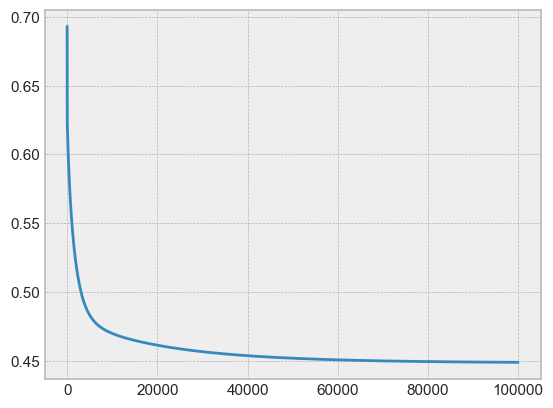

In [63]:
plt.style.use('bmh')
plt.plot(cost_epoch)

In [64]:
ones = np.ones((X_test.shape[0], 1))
X_test = np.hstack((ones, X_test))

In [65]:
def predict(X, theta):
    y_p = hypothesis(X, theta)
#     print(y_p)
    y_pred = []
    for i in y_p:
        if i>=0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
            
    y_pred = np.array(y_pred)
    return y_pred, y_p

In [66]:
pred, y_before_threshold = predict(X_test, theta)

In [67]:
train_pred, _ = predict(X_train, theta)

In [68]:
for i in range(len(y_before_threshold)):
    print(y_before_threshold[i], pred[i])

[0.09965822] 0
[0.39896957] 0
[0.12482818] 0
[0.08729997] 0
[0.58164644] 1
[0.12302515] 0
[0.62049185] 1
[0.21828042] 0
[0.7267369] 1
[0.10034083] 0
[0.08725902] 0
[0.31618697] 0
[0.92203192] 1
[0.08575232] 0
[0.85192972] 1
[0.86336969] 1
[0.24029082] 0
[0.15835396] 0
[0.54474511] 1
[0.54575058] 1
[0.36673193] 0
[0.13536298] 0
[0.91309259] 1
[0.61199019] 1
[0.9134266] 1
[0.04507156] 0
[0.95198433] 1
[0.15255874] 0
[0.34951238] 0
[0.13345309] 0
[0.12088798] 0
[0.22878595] 0
[0.50284058] 1
[0.54732551] 1
[0.54695668] 1
[0.16840848] 0
[0.55302373] 1
[0.59625534] 1
[0.09215217] 0
[0.08988959] 0
[0.09713539] 0
[0.44724425] 0
[0.0595455] 0
[0.76666063] 1
[0.85850117] 1
[0.09206386] 0
[0.44064968] 0
[0.12128092] 0
[0.87120191] 1
[0.47999509] 0
[0.46643971] 0
[0.31426699] 0
[0.81110479] 1
[0.92014481] 1
[0.31434588] 0
[0.18256519] 0
[0.0702398] 0
[0.09204845] 0
[0.08506626] 0
[0.93950099] 1
[0.11372229] 0
[0.19320189] 0
[0.11077997] 0
[0.67417755] 1
[0.69548697] 1
[0.78299478] 1
[0.69950975] 1

In [69]:
def accuracy(pred, label):
    temp = 0
    
    for i in range(pred.shape[0]):
        if pred[i]==label[i]:
            temp+=1
        else:
            pass
    print("Accuracy = ", (temp/pred.shape[0])*100, "%", sep='')
    return (temp/pred.shape[0])*100

In [70]:
accuracy(train_pred, Y_train)

Accuracy = 79.2368125701459%


79.2368125701459

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
model = LogisticRegression()

In [73]:
model.fit(X_train, Y_train)

LogisticRegression()

In [74]:
model.score(X_train, Y_train)

0.7901234567901234

In [75]:
model.coef_

array([[ 1.09010802e+00, -1.10438316e+00, -3.13300918e-02,
         2.30909989e-04,  1.87768299e-03,  5.60483980e-01,
         4.73549013e-01,  5.60750251e-02,  1.80820854e+00,
        -7.18100521e-01]])